## Video Lesson \#12, Part 3: Mapping with cartopy

Accompanying data file: `woa18_oxy.nc`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## Cartopy examples

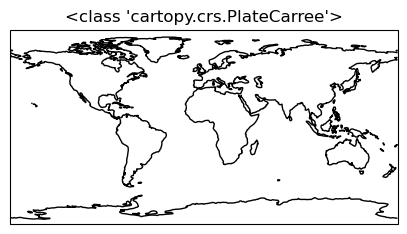

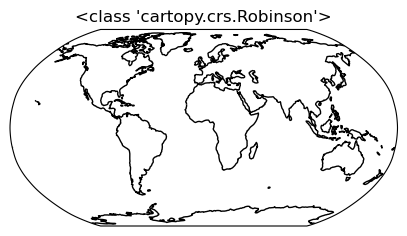

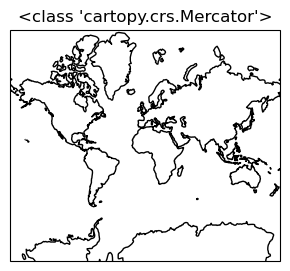

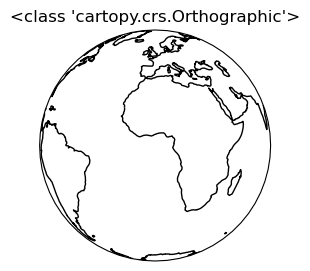

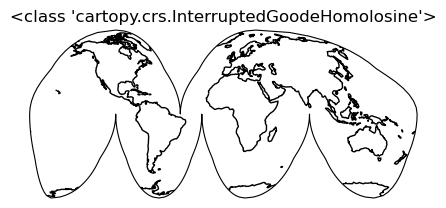

In [2]:
# Look at some different projections
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]

for proj in projections:
    plt.figure(figsize=(5, 3))
    ax = plt.axes(projection=proj)
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

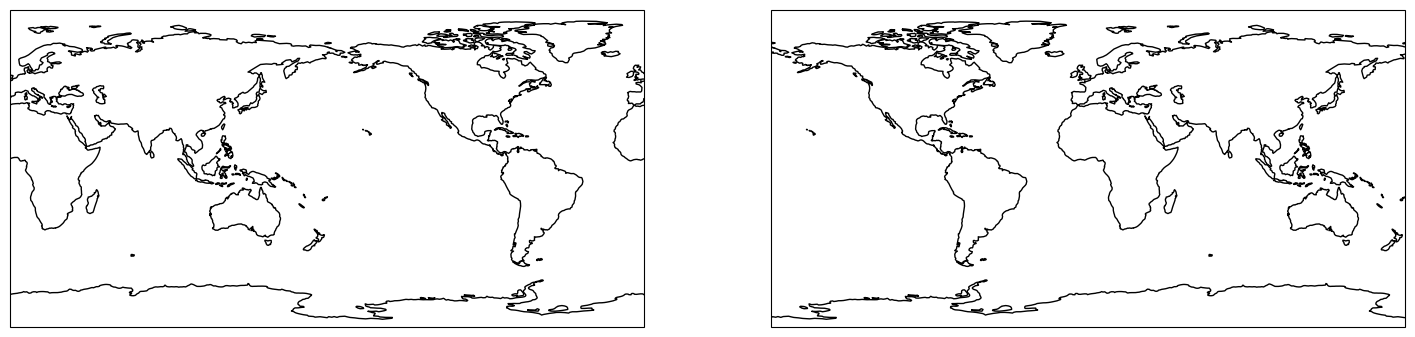

In [3]:
fig= plt.figure(figsize=(18,12))

# Change the central longitude
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax1.coastlines()

ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines();

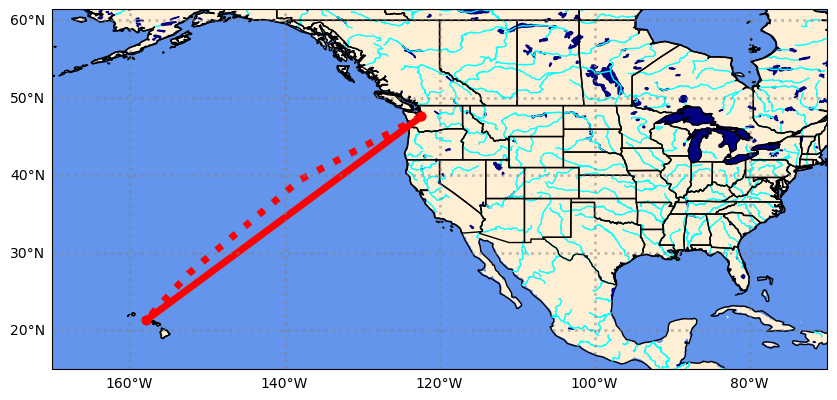

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# add the coastlines
ax.coastlines(resolution='110m', color='k')

# add the gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=2, color='gray', alpha=0.5, linestyle=':')

# removing labels is different than in the video 
# xlabels_top and ylabels_right are now deprecated 
gl.top_labels = False 
gl.right_labels = False 

# make the labels look like lon/lat instead of just numbers
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# fill in the ocean and land
ax.add_feature(cfeature.LAND, color='papayawhip')
ax.add_feature(cfeature.OCEAN, color='cornflowerblue')

# [x1, x2, y1, y2]
extent = [-170,-70,15,50]
ax.set_extent(extent)

# add additional features
ax.add_feature(cfeature.LAKES, color='navy')
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='aqua')
ax.add_feature(cfeature.STATES, edgecolor='k')

seattle = [-122.332, 47.606]
honolulu = [-157.8583, 21.3069]

ax.plot([seattle[0], honolulu[0]], [seattle[1], honolulu[1]], 
        'ro-', lw=5, transform=ccrs.PlateCarree())
ax.plot([seattle[0], honolulu[0]], [seattle[1], honolulu[1]],
        'ro:', lw=5, transform=ccrs.Geodetic());

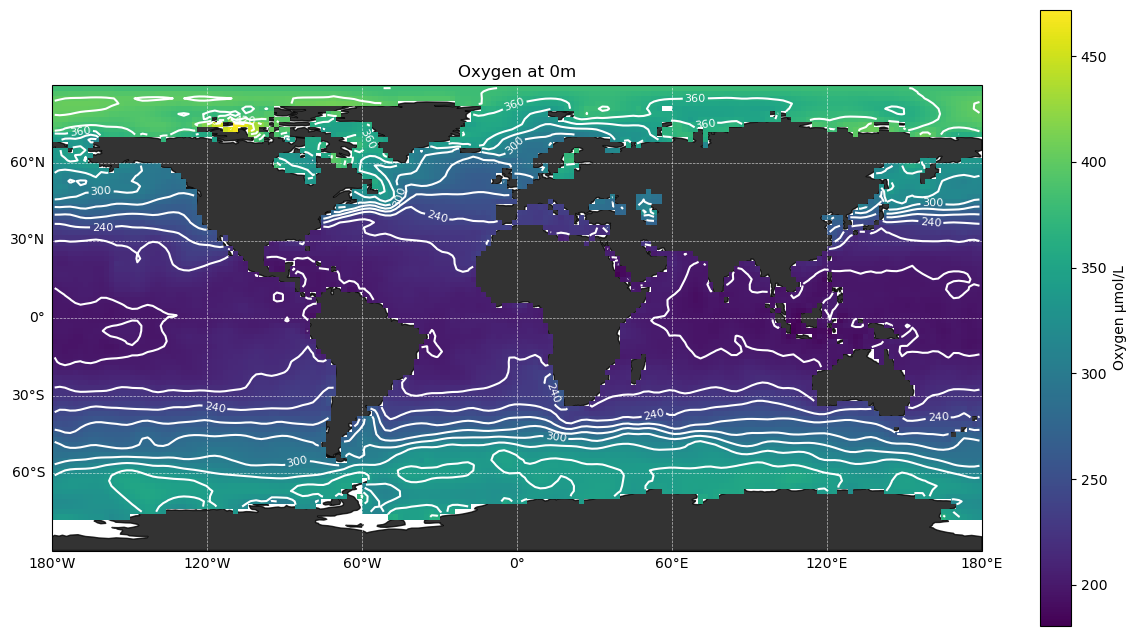

In [5]:
# Using our Oxygen data
# Change the path to wherever you have the data
filepath = 'data/woa18_oxy.nc'

# Read the data - times are in a bad format, so don't parse them
oxy = xr.open_dataset(filepath,decode_times=False)

# Take the average of the data along longitudes and select the only time level
# Make numpy arrays for lat, depth, and o_data
lat = oxy['lat'].values
lon = oxy['lon'].values
# subset to just the surface layer
o_data = oxy['o_an'].sel(depth=0, method='nearest').isel(time=0).values

# create the figure
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.PlateCarree())

pcm = ax.pcolormesh(lon,lat,o_data,transform=ccrs.PlateCarree())
cntr = ax.contour(lon,lat,o_data,levels=17,transform=ccrs.PlateCarree(),colors='w')
ax.clabel(cntr,levels=cntr.levels[::3],colors='w',fontsize=8)

# add the colorbar
c = plt.colorbar(pcm, ax=ax)
c.set_label('Oxygen µmol/L')

# fill in the land
ax.add_feature(cfeature.LAND, color='k',alpha=0.8)

# add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='w', alpha=0.7, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title('Oxygen at 0m');